# Basic equations
Let's show action and equations of motion first (see double inflation.ipynb)
$$
S=\int d^4x\sqrt{-g}\left[\frac{M_\text{P}^2}{2}R-\frac{1}{2}(\partial\phi)^2-\frac{f(\phi)}{2}(\partial\chi)^2-V(\phi,\chi)\right]
$$
The equation of motion:
$$\phi''=-(3-\frac{\rho+p}{2M^2_\rm P H^2}+\frac{\Gamma^\phi}{H})\phi'-\frac{V_\phi}{H^2}+b_\phi e^{2b}\chi'^2\,.$$
$$\chi''=-(3-\frac{\rho+p}{2M^2_\rm P H^2}+\frac{\Gamma^\chi}{H}+2b_\phi \phi')\chi'-e^{-2b}\frac{V_\chi}{H^2}\,.$$
Continuity equation and Friedman equation：
$$\rho'_r=-4\rho_r+H\Gamma_r^\phi\phi'^2+H\Gamma_r^\chi e^{2b}\chi'^2$$
$$\rho'_m=-3\rho_m+H\Gamma_m^\phi\phi'^2+H\Gamma_m^\chi e^{2b}\chi'^2$$
$$H'=-\frac{\rho+p}{2M^2_\rm P H}=\frac{1}{2M_\rm P ^2H}(\frac{4}{3}\rho_r+\rho_m+H^2\phi'^2+H^2e^{2b}\chi'^2)$$
where $$\rho+p=\frac{4}{3}\rho_r+\rho_m+H^2\phi'^2+H^2e^{2b}\chi'^2$$
$$\Gamma_\phi=\Gamma_r^\phi+\Gamma_m^\phi\qquad \Gamma_\chi=\Gamma_r^\chi+\Gamma_m^\chi$$ and the density of inflations are
$$\rho'_\phi=-3H^2\phi'^2-H\Gamma^\phi\phi'^2+b_\phi e^{2b}\phi'\chi'^2  H^2$$
$$\rho'_\chi=-3H^2\chi'^2-H\Gamma^\chi e^{2b}\chi'^2-b_\phi e^{2b}\phi'\chi'^2H^2 $$
we consider the KKLT model
$$V(\phi,\chi) = \frac{1}{2}m_\phi^2\phi^2 + V_0\frac{\chi^2}{\chi_0^2+\chi^2}\,, b(\phi)=b_1\phi$$
where $b_1$ is a constant with dimensions $M_p^{-1}$.

# Initial values selection
we follow Ref.[1] selecting 
$$\chi_0=0.06M_p\,,\quad m_\phi=6\chi_0\,,\quad V_0=\frac{(m_\phi\cdot M_p)^2}{1.2}\,,\quad \phi=16M_p\,, \quad \chi=0.96M_p \,,\quad \dot\phi\sim\dot\chi\sim 0$$
where $M_p$ is the Plank mass. In addition to this, we can also adjust the following quantities:
$$b=1\,,\quad \Gamma^\phi_ r=10^{-7}\,,\quad \Gamma^\phi_ m=10^{-9}\,,\quad \Gamma^\chi_ m=10^{-7}\,,\quad \Gamma^\chi_ m=10^{-9}$$
The quantities we draw have been dimensionless, such as $\phi=\phi/M_\rm p$

In [60]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
import math

m_p=1#plank mass
b=1
chi0=0.06*m_p


mphi=6*chi0

V0=mphi**2**m_p**2/1.2

m_p=1#plank mass

def e2b(phi):
    return math.e**(2*b*phi)
def em2b(phi):
    return math.e**(-2*b*phi)
def b_phi(phi):
    return b
def V_phi(phi):
    return mphi**2*phi/m_p**3
def V_chi(chi):
    return (2*V0*chi/(chi0**2+chi**2)-2*chi**3*V0/((chi0**2+chi**2)**2))/m_p**3
def Vp(phi,chi):
    return (V0*chi**2/(chi0**2+chi**2)+mphi**2*phi**2/2)/(m_p**4)

# defination above should be changed for different models

phi=16*m_p
chi=0.96*m_p
Hi=(Vp(phi,chi)/ 3)**0.5

rho_phii=mphi**2*phi**2/(2*m_p**4)
rho_chii=V0*chi**2/(chi0**2+chi**2)/(m_p**4)
rho_ri=1e-20
rho_mi=1e-20

phii=16*m_p
chii=0.96*m_p
phi_Ni=1e-10
chi_Ni=1e-10

Gamma_phi_r=1e-7
Gamma_phi_m=1e-9
Gamma_chi_r=1e-7
Gamma_chi_m=1e-9

Gamma_chi=Gamma_chi_r+Gamma_chi_m
Gamma_phi=Gamma_phi_r+Gamma_phi_m
def sys(t, var):#here, t actully is N, to avoid naming trouble later, we will briefly use t here.
    phi,chi,phi_N,chi_N,rho_r,rho_m,H = var
    dphidN=phi_N
    dchidN=chi_N
    dphi_NdN = -(3+Gamma_phi/H-(4*rho_r/3+rho_m+H**2*phi_N**2+H**2*e2b(phi)*chi_N**2)/(2*m_p**2*H**2))*phi_N-V_phi(phi)/(H**2)+b_phi(phi)*e2b(phi)*chi_N**2
    dchi_NdN = -(3+Gamma_chi/H+2*b_phi(phi)*phi_N-(4*rho_r/3+rho_m+H**2*phi_N**2+H**2*e2b(phi)*chi_N**2)/(2*m_p**2*H**2))*chi_N-em2b(phi)*V_chi(chi)/(H**2)
    drho_rdN = -4*rho_r+H*Gamma_phi_r*phi_N**2+H*Gamma_chi_r*chi_N**2*e2b(phi)
    drho_mdN = -3*rho_m+H*Gamma_phi_m*phi_N**2+H*Gamma_chi_m*chi_N**2*e2b(phi)
    dHdN=-1/H*(4*rho_r/3+rho_m+H**2*phi_N**2++H**2*e2b(phi)*chi_N**2)/(2*m_p**2)
    return [dphidN,dchidN,dphi_NdN,dchi_NdN,drho_rdN,drho_mdN,dHdN]
NN = np.arange(0, 110, 0.1)  # Time points where solution is needed
sol = solve_ivp(sys, [NN[0], NN[-1]], [phii,chii, phi_Ni,chi_Ni, rho_ri, rho_mi,Hi], rtol=1e-7, atol=1e-7, t_eval=NN,method='RK45')
N = sol.t
phi,chi, phi_N,chi_N,rho_r, rho_m,H = sol.y
# Note that here we have chosen a particular potential KKLT
rho_chi=0.5*H**2*chi_N**2*e2b(phi)+V0*chi**2/(chi0**2+chi**2)
rho_phi=0.5*H**2*phi_N**2+0.5*mphi**2*phi**2


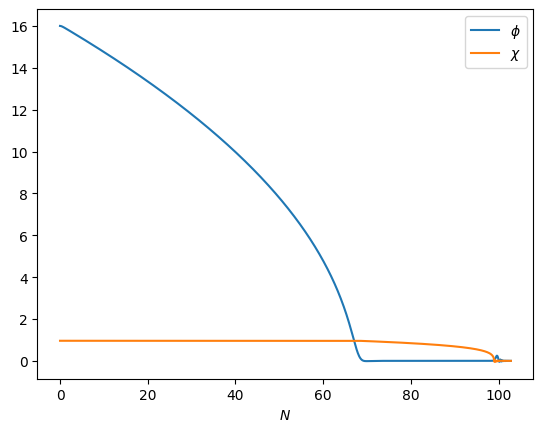

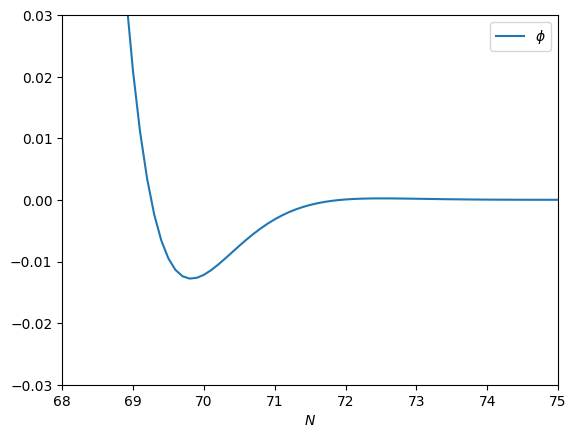

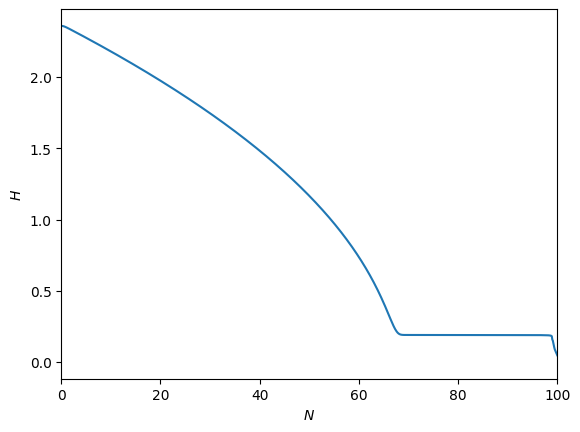

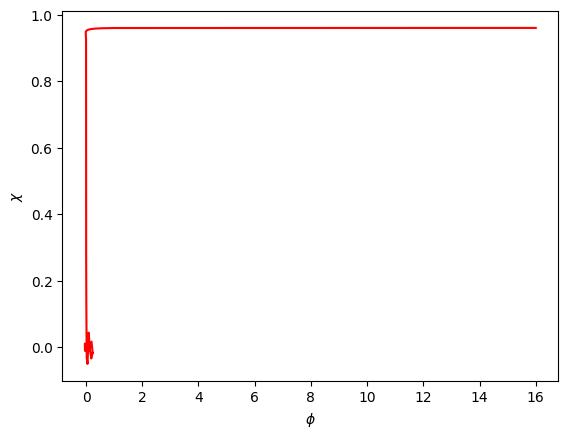

In [61]:
plt.plot(N, phi, label=r'$\phi$')
plt.plot(N, chi, label=r'$\chi$')
plt.xlabel(r'$N$')
plt.legend()
plt.show()
plt.plot(N, phi, label=r'$\phi$')
plt.xlabel(r'$N$')
plt.xlim(68,75)
plt.ylim(-0.03,0.03)
plt.legend()
plt.show()
plt.plot(N,H)
plt.xlabel(r'$N$')
plt.ylabel(r'$H$')
# plt.yscale('log')
plt.xlim(0,100)
plt.show()

plt.plot(phi, chi, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\chi$')
plt.show()

## Slow roll parameters

$$\epsilon_H=-\frac{\dot H}{H^2}=\frac{1}{2}(\phi\prime^2+e^{2b}\chi\prime^2)$$

<!-- $$\eta_H=\frac{\ddot \phi}{H\dot\phi}=\epsilon_H+\frac{1}{2\epsilon_H}\frac{d\epsilon_H}{dN}$$
However, in this note we use the defination: -->
$$\eta_H=\frac{\dot\epsilon_H}{H\epsilon_H}=\frac{\epsilon_H'}{\epsilon_H}=\frac{\phi'\phi''+e^{2b}\chi'\chi''+b_\phi e^{2b}\chi'^2}{\epsilon_H}$$
There is a difference here from Ref[1], probably because of the different definition of $\eta_H$

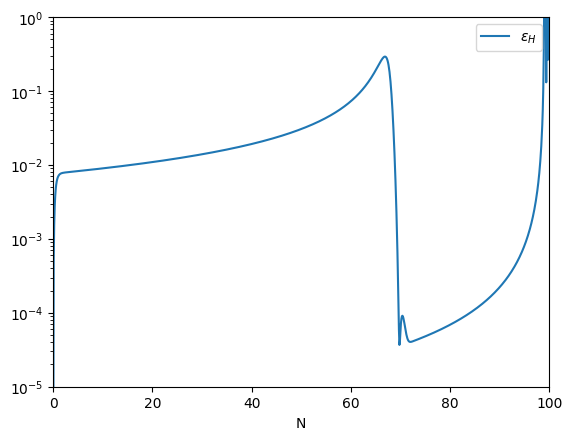

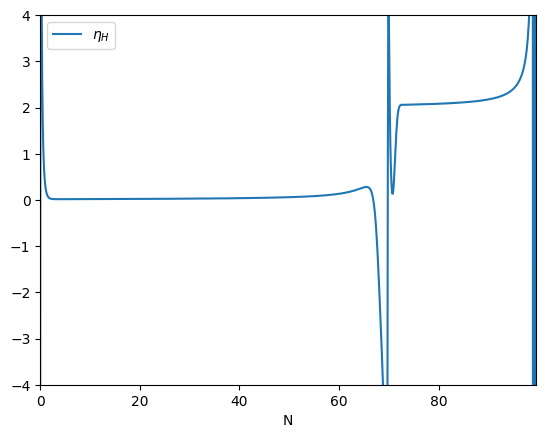

In [62]:
eps=0.5*(phi_N**2+e2b(phi)*chi_N**2)
plt.plot(N, eps, label=r'$\epsilon_H$')
# plt.axhline(1, color='black')
plt.legend()
plt.xlabel('N')
plt.xlim(0,100)
plt.yscale('log')
plt.ylim(1e-5,1)
plt.show()
index_of_inflation_end = np.argmin(np.abs(eps - 1)) 
End_inflation=N[index_of_inflation_end]
# print(f'The end of inflation: N= {End_inflation}')


phi_NN=-(3+Gamma_phi/H-(4*rho_r/3+rho_m+H**2*phi_N**2+H**2*e2b(phi)*chi_N**2)/(2*m_p**2*H**2))*phi_N-V_phi(phi)/(H**2)+b_phi(phi)*e2b(phi)*chi_N**2
chi_NN=-(3+Gamma_chi/H+2*b_phi(phi)*phi_N-(4*rho_r/3+rho_m+H**2*phi_N**2+H**2*e2b(phi)*chi_N**2)/(2*m_p**2*H**2))*chi_N-em2b(phi)*V_chi(chi)/(H**2)
eta=(phi_N*phi_NN+chi_N*chi_NN*e2b(phi)+b_phi(phi)*e2b(phi)*chi_N**2)/eps
plt.plot(N, eta, label=r'$\eta_H $')
plt.legend()
plt.xlabel('N')
plt.xlim(0,End_inflation)
plt.ylim(-4,4)
plt.show()
# # different defination of eta
# eta2=(phi_N*phi_NN+chi_N*chi_NN*e2b(phi)+b_phi(phi)*e2b(phi)*chi_N**2)/(2*eps)+eps
# plt.plot(N, eta2, label=r'$\eta_H $')
# plt.legend()
# plt.xlabel('N')
# plt.xlim(0,End_inflation)
# plt.ylim(-4,4)
# plt.show()

# Density parameter
$$\Omega_i=\frac{\rho_i}{\rho_{\rm{total}}}$$

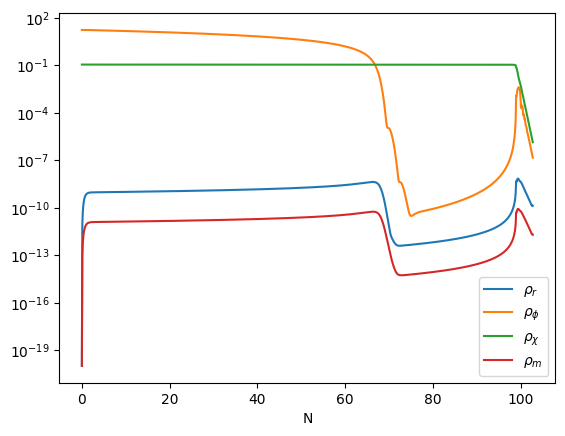

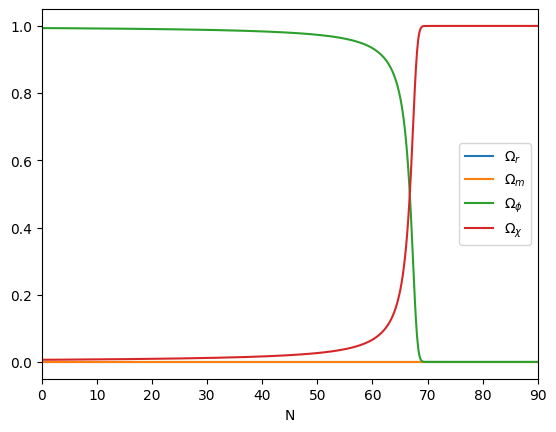

In [64]:
plt.plot(N, rho_r, label=r'$\rho_r$')
plt.plot(N, rho_phi, label=r'$\rho_\phi$')
plt.plot(N, rho_chi, label=r'$\rho_\chi$')
plt.plot(N, rho_m, label=r'$\rho_m$')
plt.legend()
plt.xlabel('N')
plt.yscale('log')
plt.show()
Omega_phi=rho_phi/(rho_phi+rho_r+rho_m+rho_chi)
Omega_chi=rho_chi/(rho_phi+rho_r+rho_m+rho_chi)
Omega_r=rho_r/(rho_phi+rho_r+rho_m+rho_chi)
Omega_m=rho_m/(rho_phi+rho_r+rho_m+rho_chi)
plt.plot(N, Omega_r, label=r'$\Omega_r$')
plt.plot(N, Omega_m, label=r'$\Omega_m$')
plt.plot(N, Omega_phi, label=r'$\Omega_\phi$')
plt.plot(N, Omega_chi, label=r'$\Omega_\chi$')
plt.legend()
plt.xlim(0,90)
plt.xlabel('N')
plt.show()

# For different b
$b$ should be choosed between (0, 4)/ $M_\rm P$, see Ref[1], choosing different $b$ values, we can get slightly different results. Modify the code to get the amount you want to draw

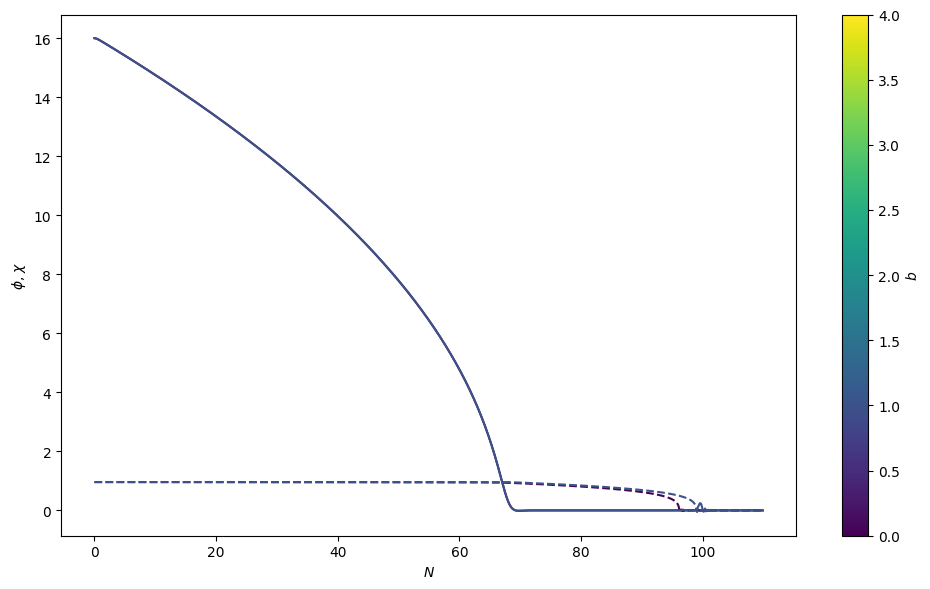

In [78]:
from matplotlib.cm import ScalarMappable
from matplotlib.cm import get_cmap

b_values = np.linspace(0/m_p, 4/m_p, 5)
NN = np.arange(0, 110, 0.1)  # Time points where solution is needed
fig, ax = plt.subplots(figsize=(10, 6))

cmap = plt.colormaps.get_cmap('viridis')  
norm = plt.Normalize(vmin=b_values.min(), vmax=b_values.max())

for b in b_values:
    sol = solve_ivp(sys, [NN[0], NN[-1]], [phii, chii, phi_Ni, chi_Ni, rho_ri, rho_mi, Hi], 
                    rtol=1e-6, atol=1e-6, t_eval=NN, method='RK45')
    N = sol.t
    phi, chi, phi_N, chi_N, rho_r, rho_m, H = sol.y
    
    rho_chi = 0.5 * H**2 * chi_N**2 * e2b(phi) + V0 * chi**2 / (chi0**2 + chi**2)
    rho_phi = 0.5 * H**2 * phi_N**2 + 0.5 * mphi**2 * phi**2

    color = cmap(norm(b))
    
    ax.plot(N, phi, color=color)
    ax.plot(N, chi, '--', color=color)# What quantity do you want to get in this drawing? set here

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\phi$, $\chi$')

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
 
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r'$b$')

plt.tight_layout()
plt.show()


# Other adjustable amounts
$$\Gamma_r^\phi\qquad \Gamma_m^\phi\qquad\Gamma_r^\chi\qquad\Gamma_m^\chi\qquad \chi_0 \qquad m_\phi \qquad V_0  \qquad b$$
Some of these degrees of freedom may be interrelated(b?), and the range of values of some quantities is strictly constrained, requiring detailed study of the model.

For example we select (note we set Plank mass equal to one) 
$$\Gamma_r^\phi=\Gamma_r^\chi=10^{-5}\qquad \Gamma_m^\phi=\Gamma_m^\chi=10^{-9}\qquad \chi_0=0.09 \qquad m_\phi=6\cdot\chi_0 \qquad V_0=(m_\phi)^2/5 \qquad b=1$$
I adjusted the initial values as much as possible (even though they might not be observationally or theoretically allowed), and still could not find a matter or radiation dominated period in the middle of the double inflation with KKLT-like potential.

In [101]:
m_p=1#plank mass
b=1
chi0=0.09*m_p
mphi=6*chi0
V0=mphi**2**m_p**2/5

phii=16*m_p
chii=0.96*m_p
phi_Ni=1e-10
chi_Ni=1e-10

Gamma_phi_r=1e-5
Gamma_phi_m=1e-9
Gamma_chi_r=1e-5
Gamma_chi_m=1e-9
Gamma_chi=Gamma_chi_r+Gamma_chi_m
Gamma_phi=Gamma_phi_r+Gamma_phi_m

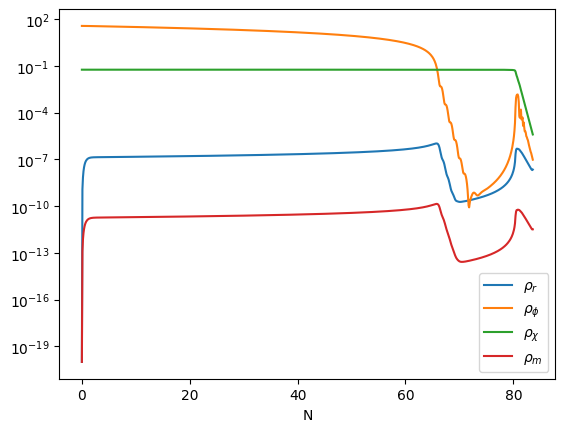

In [102]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
import math


def e2b(phi):
    return math.e**(2*b*phi)
def em2b(phi):
    return math.e**(-2*b*phi)
def b_phi(phi):
    return b
def V_phi(phi):
    return mphi**2*phi/m_p**3
def V_chi(chi):
    return (2*V0*chi/(chi0**2+chi**2)-2*chi**3*V0/((chi0**2+chi**2)**2))/m_p**3
def Vp(phi,chi):
    return (V0*chi**2/(chi0**2+chi**2)+mphi**2*phi**2/2)/(m_p**4)

# defination above should be changed for different models

phi=16*m_p
chi=0.96*m_p
Hi=(Vp(phi,chi)/ 3)**0.5

rho_phii=mphi**2*phi**2/(2*m_p**4)
rho_chii=V0*chi**2/(chi0**2+chi**2)/(m_p**4)
rho_ri=1e-20
rho_mi=1e-20



def sys(t, var):#here, t actully is N, to avoid naming trouble later, we will briefly use t here.
    phi,chi,phi_N,chi_N,rho_r,rho_m,H = var
    dphidN=phi_N
    dchidN=chi_N
    dphi_NdN = -(3+Gamma_phi/H-(4*rho_r/3+rho_m+H**2*phi_N**2+H**2*e2b(phi)*chi_N**2)/(2*m_p**2*H**2))*phi_N-V_phi(phi)/(H**2)+b_phi(phi)*e2b(phi)*chi_N**2
    dchi_NdN = -(3+Gamma_chi/H+2*b_phi(phi)*phi_N-(4*rho_r/3+rho_m+H**2*phi_N**2+H**2*e2b(phi)*chi_N**2)/(2*m_p**2*H**2))*chi_N-em2b(phi)*V_chi(chi)/(H**2)
    drho_rdN = -4*rho_r+H*Gamma_phi_r*phi_N**2+H*Gamma_chi_r*chi_N**2*e2b(phi)
    drho_mdN = -3*rho_m+H*Gamma_phi_m*phi_N**2+H*Gamma_chi_m*chi_N**2*e2b(phi)
    dHdN=-1/H*(4*rho_r/3+rho_m+H**2*phi_N**2++H**2*e2b(phi)*chi_N**2)/(2*m_p**2)
    return [dphidN,dchidN,dphi_NdN,dchi_NdN,drho_rdN,drho_mdN,dHdN]
NN = np.arange(0, 110, 0.1)  # Time points where solution is needed
sol = solve_ivp(sys, [NN[0], NN[-1]], [phii,chii, phi_Ni,chi_Ni, rho_ri, rho_mi,Hi], rtol=1e-7, atol=1e-7, t_eval=NN,method='RK45')
N = sol.t
phi,chi, phi_N,chi_N,rho_r, rho_m,H = sol.y
# Note that here we have chosen a particular potential KKLT
rho_chi=0.5*H**2*chi_N**2*e2b(phi)+V0*chi**2/(chi0**2+chi**2)
rho_phi=0.5*H**2*phi_N**2+0.5*mphi**2*phi**2
plt.plot(N, rho_r, label=r'$\rho_r$')
plt.plot(N, rho_phi, label=r'$\rho_\phi$')
plt.plot(N, rho_chi, label=r'$\rho_\chi$')
plt.plot(N, rho_m, label=r'$\rho_m$')
plt.legend()
plt.xlabel('N')
plt.yscale('log')
plt.show()

# References
[1] Braglia, Matteo, et al. "Generating primordial features at large scales in two field models of inflation." Journal of Cosmology and Astroparticle Physics 2020.08 (2020): 025.